# Crossover strategy - Long timeframe

The following example shows the crossover strategy, tested over daily chart for a year.  

https://squareoff.in/a-simple-ema-crossover-trading-strategy-with-exceptional-returns/

In [9]:
# Importing python packages
from datetime import datetime
import backtrader as bt
from backtrader.indicators import SMA
import backtrader.analyzers as btanalyzers
from GetData import getData
import numpy as np
import matplotlib as plt
import pyfolio as pf

In [10]:
# Ensure that the plot is shown inside the Jupyter Notebook
%matplotlib inline

In [28]:
# Download data
#symbol = 'NG=F'
#symbol = 'aapl'
symbol = 'googl'
interval = '1WK'
period = '1y'

getdata = getData()
rawData = getdata.getHistoryYfinance(symbol=symbol, interval=interval, period=period)


[*********************100%***********************]  1 of 1 completed


In [12]:
# Count the number of elements in the dataframe.
rawData.count()

Open         54
High         54
Low          54
Close        54
Adj Close    54
Volume       54
dtype: int64

In [13]:
class SmaCross(bt.Strategy):
    
    # list of parameters which are configurable for the strategy
    params = dict(
        pEMA1=10,  # period for the fast moving average - Default 10
        pEMA2=50  # period for the fast moving average - Default 50
    )

    def __init__(self):
        self.EMA1 = bt.ind.EMA(period=self.p.pEMA1)  # fast moving average
        self.EMA2 = bt.ind.EMA(period=self.p.pEMA2)  # fast moving average
        self.LongPos = False
        self.ShortPos = False
        self.OrderSize = 0                    


    def next(self):
        size = int(self.broker.getcash() / self.data.close[0])
        print('____________________________________')
        print(self.broker.getcash())
        print(size)
        if self.EMA1 > self.EMA2 :  # cross upwards
            if self.position and self.ShortPos == True:
                print('CLOSE SHORT , %.2f' % self.data.close[0])
                self.ShortPos = False
                self.close(size=self.OrderSize)

            print('BUY CREATE , %.2f' % self.data.close[0])
            self.LongPos = True
            self.OrderSize = size
            self.buy(size=size)

        elif self.EMA1 < self.EMA2:
            if self.position and self.LongPos ==True:
                print('CLOSE LONG , %.2f' % self.data.close[0])
                self.LongPos = False
                self.close(size=self.OrderSize)
                
            print('SELL CREATE , %.2f' % self.data.close[0])
            self.ShortPos = True
            self.OrderSize = size
            self.sell(size=size)

In [29]:
startCash = 10000

cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
data = bt.feeds.PandasData(dataname=rawData) # Create a data feed
cerebro.adddata(data)  # Add the data feed
cerebro.broker.set_cash(startCash)
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe') 
cerebro.addstrategy(SmaCross)  # Add the trading strategy
#cerebro.run()
thestrats = cerebro.run()
thestrat = thestrats[0]

print('Sharpe Ratio:', thestrat.analyzers.mysharpe.get_analysis())


____________________________________
10000.0
4
SELL CREATE , 2314.93
____________________________________
19060.0
8
SELL CREATE , 2321.01
____________________________________
37452.880859375
17
SELL CREATE , 2178.16
____________________________________
74712.630859375
35
SELL CREATE , 2116.10
____________________________________
148686.5322265625
68
SELL CREATE , 2155.85
Sharpe Ratio: OrderedDict([('sharperatio', 0.719150815189443)])


In [32]:
print(cerebro.broker.getvalue())
print(cerebro.broker.get_cash())

10712.1259765625
148686.5322265625


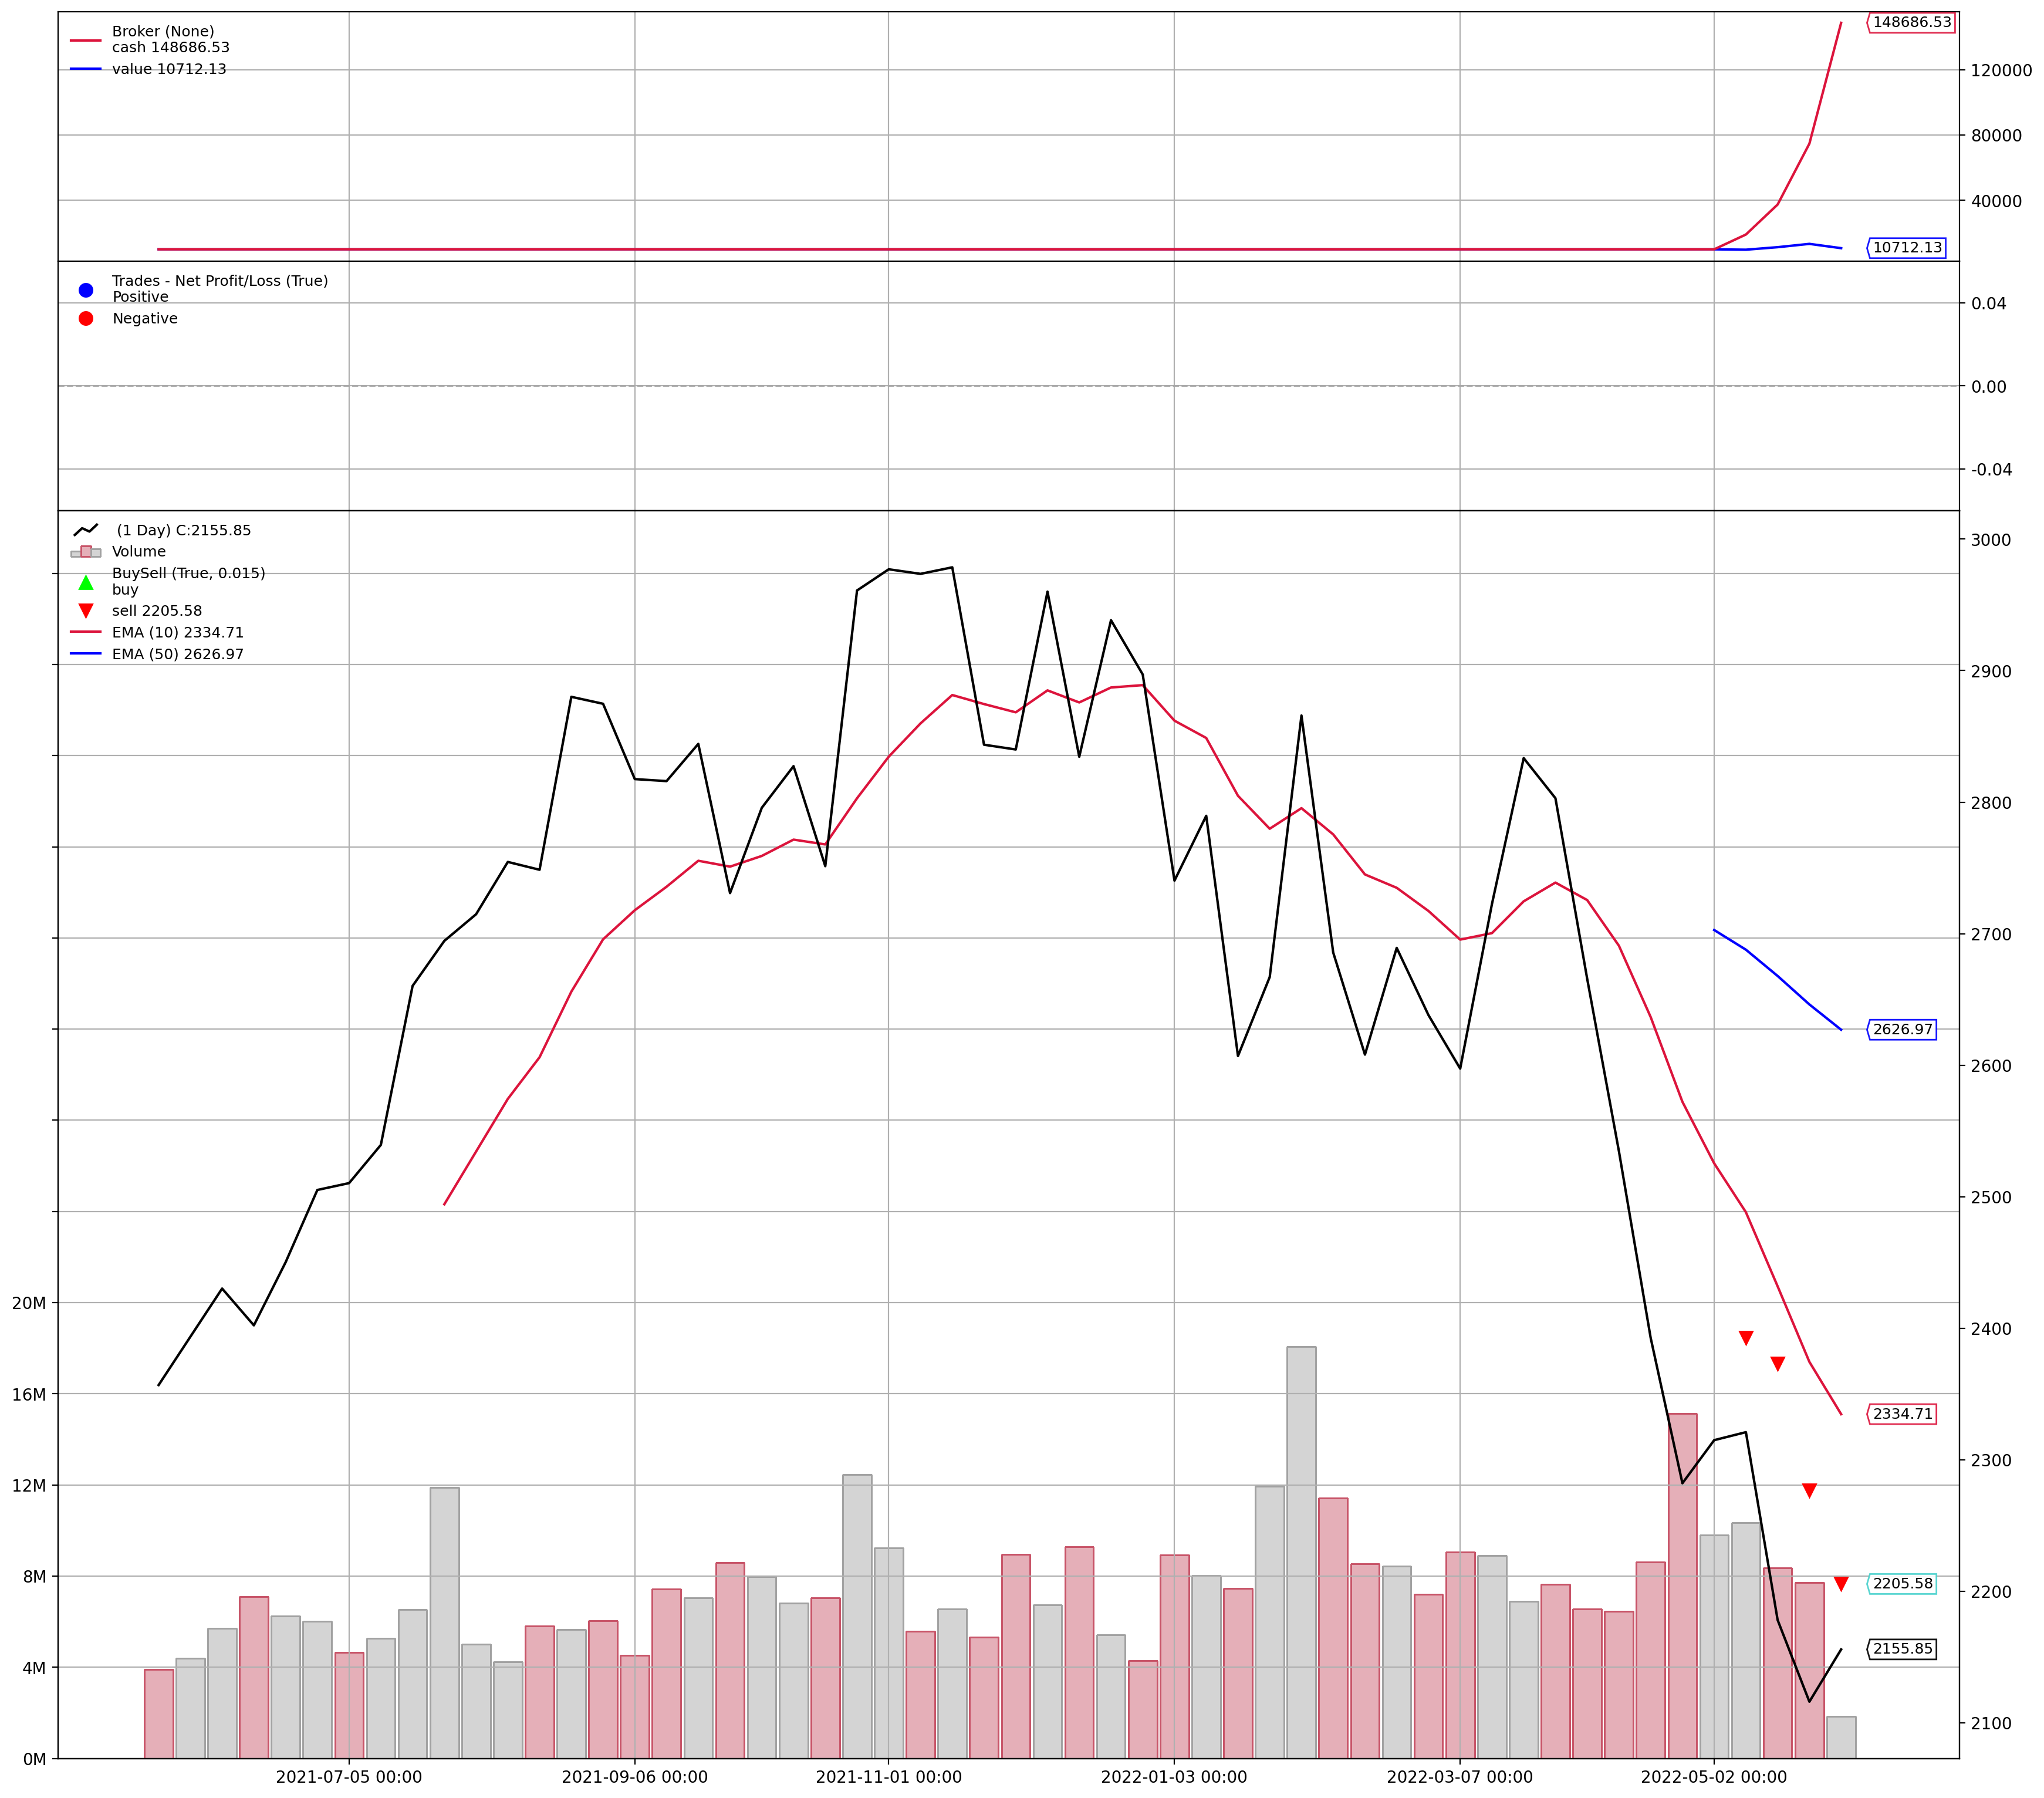

[[<Figure size 3600x3200 with 4 Axes>]]

In [31]:

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[18, 16]
plt.rcParams['figure.dpi']=200
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'
cerebro.plot(height= 30, iplot= False)